In [13]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.io
import numpy as np
import pickle
#import seaborn
fileName="Train_Record.pkl"
lstm_path1="../5_rawNewPaper/compare_4feature_LSTM/"+fileName
gru_path1="../5_rawNewPaper/compare_4feature_GRU/"+fileName
dbilstm_path1="../4_NewPaper_revision/compare_6feature_bilstm_/"+fileName
dlstm_path1="../4_NewPaper_revision/compare_6feature_lstm_/"+fileName
clstm_path1="./CommonOn_NewPaper/"+"clstm_3_1_dia=1.pkl"
cnn_path1="./CommonOn_NewPaper/"+"cnn2_2.pkl"
#clstm_path2="CommonOn_NewPaper/"+"train_record_start2_8_800HZ.pkl"
params={
    'axes.labelsize': '22',
    'xtick.labelsize':'22',
    'ytick.labelsize':'22',
    'lines.linewidth':2.5 ,
    'legend.fontsize': '22',
    'figure.figsize'   : '12,8'    # set figure size
}

In [8]:

def process_old_data(Path):
    with open(Path, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        all_score, all_loss = u.load()
    _all_score=np.asarray(all_score[6])
    #print(_all_score.shape)
    _all_score=_all_score.squeeze()
    x=np.transpose(_all_score,(1,2,0))
    print(x.shape)
    return x
def process_new_data(Path):
    with open(Path, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        all_score, all_loss = u.load()
    _all_score=np.asarray(all_score)
    #print(_all_score.shape)
    _all_score=_all_score.squeeze()
    x=np.transpose(_all_score,(1,2,0))
    print(x.shape)
    return x
lstm=process_old_data(lstm_path1)
gru=process_old_data(gru_path1)
dlstm=process_old_data(dlstm_path1)
dbilstm=process_old_data(dbilstm_path1)

(3, 5, 199)
(3, 5, 199)
(3, 5, 29)
(3, 5, 29)


In [10]:
import librosa 
dbilstm_=dbilstm[0][4]
dbilstm_=dbilstm_.reshape((1,-1))
dbilstm_=np.asfortranarray(dbilstm_)
print(dbilstm_.shape)
dbilstm_ = librosa.resample(dbilstm_, 3, 50)
print(dbilstm_.shape)

(1, 29)
(1, 484)


In [14]:

cnn=process_new_data(cnn_path1)

cnn_=cnn[0][4]
cnn_=cnn_.reshape((1,-1))
cnn_=np.asfortranarray(cnn_)
print(cnn_.shape)
cnn_ = librosa.resample(cnn_, 50, 25)

(3, 5, 500)
(1, 500)


In [15]:
import librosa 
clstm=process_new_data(clstm_path1)

clstm_=clstm[0][4]
clstm_=clstm_.reshape((1,-1))
clstm_=np.asfortranarray(clstm_)
print(clstm_.shape)
clstm_ = librosa.resample(clstm_, 50, 25)

(3, 5, 500)
(1, 500)


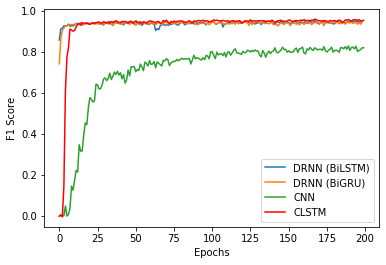

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(lstm[0][4],label="DRNN (BiLSTM)")
plt.plot(gru[0][4],label="DRNN (BiGRU)")
#plt.plot(dbilstm_.T[:200],label="Duration-LSTM")
plt.plot(cnn_.T[:200],label="CNN")
plt.plot(clstm_.T[:200],'r',label="CLSTM")

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
#plt.show()
plt.savefig("clstm_3.pdf",dpi = 1000,bbox_inches='tight')